In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df =pd.read_csv("J:/data/Social_Network_Ads.csv")

In [224]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [225]:
df.shape

(400, 5)

In [226]:
df[df['Purchased'] == 0].count()

User ID            257
Gender             257
Age                257
EstimatedSalary    257
Purchased          257
dtype: int64

In [227]:
df[df['Purchased'] == 1].count()

User ID            143
Gender             143
Age                143
EstimatedSalary    143
Purchased          143
dtype: int64

In [228]:
# x = df.iloc[:,[2,3]].values
x= df.iloc[:,[2,3]].values
y = df['Purchased']

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [230]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

In [231]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit(x_test)

In [232]:
from sklearn.naive_bayes import GaussianNB

In [233]:
naive = GaussianNB()
naive.fit(scaled_x_train,y_train)

GaussianNB()

In [234]:
y_pred = naive.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [235]:
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error

In [236]:
accuracy_score(y_test,y_pred)*100

32.5

In [237]:
confusion_matrix(y_test,y_pred)

array([[  0, 108],
       [  0,  52]], dtype=int64)

In [238]:
mse = np.sqrt(mean_squared_error(y_test,y_pred))
mse

0.8215838362577492

In [239]:
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


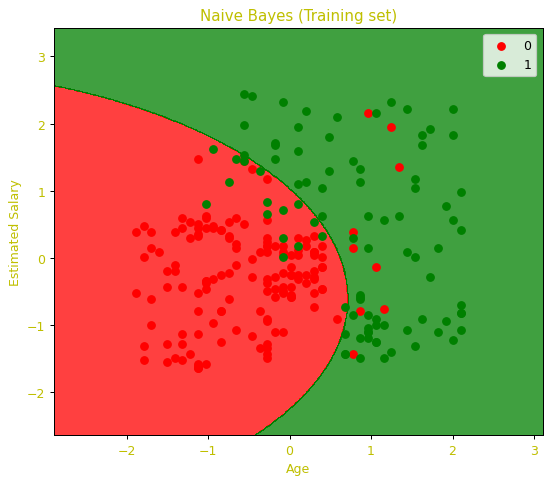

In [240]:
plt.figure(figsize=(7,6),dpi=90)
X_set, y_set = scaled_x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, naive.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Naive Bayes (Training set)',color = 'y')
plt.xlabel('Age',color = 'y')
plt.ylabel('Estimated Salary',color = 'y')
plt.xticks(color = 'y')
plt.yticks(color = 'y')
plt.legend()
plt.show()

